<a href="https://colab.research.google.com/github/ociragan/AIHub_DL_SummerCamp_Group4_alltogether/blob/main/Urban_Sounds_Classification_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


In [86]:
import os
import librosa
import librosa.display

metadata içerisindeki UrbanSound8K.csv dosyasını inceleme

In [87]:
soundsdf = pd.read_csv("/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv")

In [88]:
soundsdf.shape

(8732, 8)

In [89]:
soundsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [90]:
soundsdf.sample(5)

,slice_file_name,fsID,start,end,salience,fold,classID,class
4318,180937-7-0-4.wav,180937,173.272327,177.272327,1,1,7,jackhammer
4809,190893-2-0-11.wav,190893,5.500000,9.500000,1,5,2,children_playing
4823,190894-2-0-8.wav,190894,4.000000,8.000000,1,9,2,children_playing
526,107357-8-1-17.wav,107357,167.517232,171.517232,2,7,8,siren
4884,193394-3-0-11.wav,193394,5.500000,9.500000,1,1,3,dog_bark


1. Klasör için kullanacağımız dosya yollarını oluşturma

In [91]:
foldernumber = str(1)

In [92]:
filename = soundsdf[soundsdf["fold"]==int(foldernumber)].iloc[0,0]
filename

'101415-3-0-2.wav'

1. Klasörün 1. dosyası

In [93]:
audio_path = "/content/drive/MyDrive/UrbanSound8K/audio/fold" + foldernumber + "/" + filename
audio_path

'/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-2.wav'

In [94]:
filenumber = filename.split(".")[0]
filenumber

'101415-3-0-2'

Spectrogram resimlerini kaydetmek için drive'da spectrogram klasörü altına da fold1, fold2 diye 10 klasör açtım. 

In [95]:
spectrogram_path = "/content/drive/MyDrive/UrbanSound8K/spectrogram/fold" + foldernumber + "/" + filenumber + ".png"
spectrogram_path

'/content/drive/MyDrive/UrbanSound8K/spectrogram/fold1/101415-3-0-2.png'

Her bir klasördeki ses sınıfı mevcudunu pivot_table komutu ile görebiliriz.

In [96]:
pd.pivot_table(soundsdf, columns="fold", index="classID", values="fsID", aggfunc="count")

fold,1,2,3,4,5,6,7,8,9,10
classID,,,,,,,,,,
0,100,100,100,100,100,100,100,100,100,100
1,36,42,43,59,98,28,28,30,32,33
2,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100
5,96,100,107,107,107,107,106,88,89,93
6,35,35,36,38,40,46,51,30,31,32
7,120,120,120,120,120,68,76,78,82,96
8,86,91,119,166,71,74,77,80,82,83


Genelde her klasörde her sınıftan 100 örnek varken, 1., 6. ve 8. sınıflardan daha az örnek var.

# Spectrogram resimlerini oluşturma

In [97]:
def create_spectrogram(y):
  spec = librosa.feature.melspectrogram(y=y)
  spec_conv = librosa.amplitude_to_db(spec, ref=np.max)
  return spec_conv


In [98]:
testfile = librosa.load(audio_path)

In [99]:
print(testfile[0])

[-0.00011662 -0.00017163 -0.00017833 ... -0.04541198 -0.04675572
 -0.05040179]


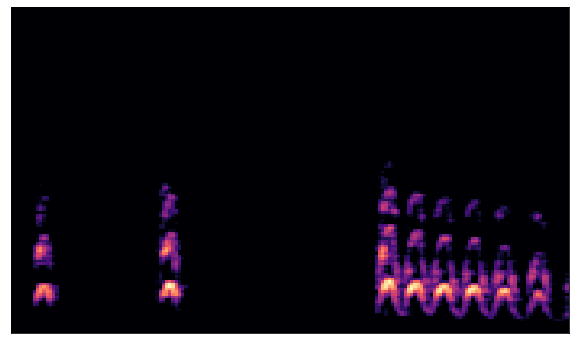

In [100]:
plt.figure(figsize=(10, 6))
spec1 = create_spectrogram(testfile[0])
# plt.subplot(4, 2, 1)
librosa.display.specshow(spec1);
plt.savefig(spectrogram_path)
# plt.colorbar(format='%+2.0f dB')
# plt.title('Linear-frequency power spectrogram')

Spectrogram klasörüne kayıt ettiğim resmi okuma

In [101]:
img1 = cv.imread(spectrogram_path)

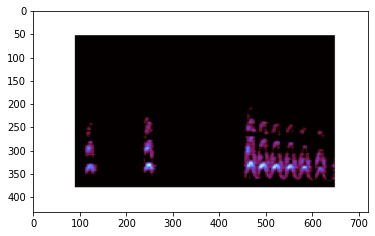

In [102]:
plt.imshow(img1)
plt.show()

Resim boyutu 432x720 pixel ve 3 renkten (R,G,B) oluşuyor.

In [103]:
img1.shape

(432, 720, 3)

In [104]:
img2 = img1.copy()

Kenardaki beyaz alanları kesme

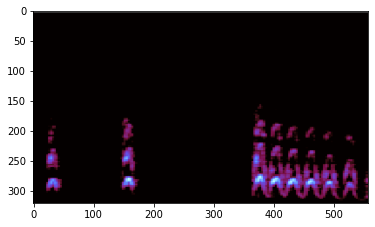

In [105]:
img3 = img2[50:370, 90:648]
plt.imshow(img3)
plt.show()


Yeni resim boyutu 320x558 pixel, 3 renk

In [106]:
img3.shape

(320, 558, 3)

Renkliden grayscale'e çevirme

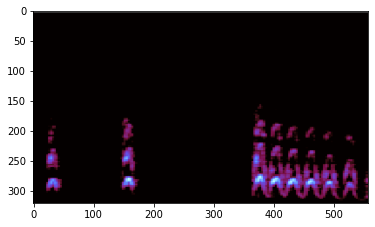

In [107]:
gray = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
plt.imshow(img3)
plt.show()

Resimin bir kesiti, grayscale olduğu için 0 (siyah) - 255 (beyaz) arası rakamlardan oluşuyor.

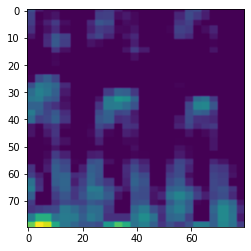

In [108]:
plt.imshow(gray[200:280, 400:480])
plt.show()

In [109]:
gray[200:280, 400:480]

array([[ 56,  56,  56, ...,   0,   0,   0],
       [ 44,  44,  44, ...,   0,   0,   0],
       [ 44,  44,  44, ...,   0,   0,   0],
       ...,
       [ 94,  94,  94, ...,  16,  16,  16],
       [176, 176, 176, ...,  41,  41,  41],
       [176, 176, 176, ...,  41,  41,  41]], dtype=uint8)

Resim array'i artık iki boyutlu

In [110]:
gray.shape

(320, 558)

In [111]:
gray.max()

255

Normalizasyon işlemi yapılarak rakamlar 0-1 arası olması sağlanıyor.

In [112]:
normal_gray = gray/255

In [113]:
normal_gray.max()

1.0